In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = np.load('./data.npy')
label = np.load('./label.npy')
print(label.shape, data.shape)

(2000, 1) (2000, 2)


In [3]:
def to_onehot(label):
    width = int(np.max(label))
    y = np.zeros([len(label), width])
    for i in range(len(y)):
        y[i][int(label[i])-1] = 1
    return y
# y = to_onehot(label)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label,
                                                  test_size = 0.3, random_state = 1)
print(x_train[:5])
print(y_train[:5])

[[-0.42642077  0.83405872]
 [ 1.65636139 -0.67727351]
 [-0.81060602  1.22225334]
 [ 0.03314629  1.23479683]
 [-0.49780507  1.60400856]]
[[ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [5]:
label = label.astype(np.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [6]:
feature_num = len(x_train[0])
sample_num = len(x_train)

In [7]:
w = np.random.randn(feature_num, 1)
w = tf.Variable(w, dtype=tf.float32)
b = tf.Variable(0.5, dtype=tf.float32)

In [8]:
y_pred = tf.sigmoid(tf.matmul(x, w) + b)
# y_pred = tf.sigmoid(tf.matmul(x, tf.reshape(w, [-1, 1])) + b)

In [9]:
def cross_entropy(y_pred, y_true):
    return tf.reduce_mean(-(y_true*tf.log(y_pred) + (1-y_true)*tf.log(1-y_pred)), axis=[0,1])
loss = cross_entropy(y_pred, y)

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
fit = optimizer.minimize(loss)

In [11]:
init = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# sess = tf.Session()
sess.run(init)

In [12]:
mini_batch = 100
epoch = 5000
history_loss = []
history_val_loss = []
for i in range(epoch):
    iter_num = int(sample_num//mini_batch)
    avg_loss = 0.
    for j in range(iter_num):
        _, L = sess.run([fit, loss], feed_dict={
            x : x_train[j*mini_batch : (j+1)*mini_batch],
            y : y_train[j*mini_batch : (j+1)*mini_batch]
        })
        avg_loss += L
    avg_loss = avg_loss/float(iter_num)
    history_loss.append(avg_loss)
    val_loss = sess.run(loss, feed_dict={x : x_val, y : y_val})
    history_val_loss.append(val_loss)
    print('--- epoch: %d, loss: %f, val_loss: %f ---'%(i+1, avg_loss, val_loss))

--- epoch: 1, loss: 0.306137, val_loss: 0.295512 ---
--- epoch: 2, loss: 0.304881, val_loss: 0.294289 ---
--- epoch: 3, loss: 0.303636, val_loss: 0.293078 ---
--- epoch: 4, loss: 0.302402, val_loss: 0.291877 ---
--- epoch: 5, loss: 0.301179, val_loss: 0.290687 ---
--- epoch: 6, loss: 0.299967, val_loss: 0.289507 ---
--- epoch: 7, loss: 0.298765, val_loss: 0.288337 ---
--- epoch: 8, loss: 0.297574, val_loss: 0.287178 ---
--- epoch: 9, loss: 0.296394, val_loss: 0.286028 ---
--- epoch: 10, loss: 0.295223, val_loss: 0.284889 ---
--- epoch: 11, loss: 0.294063, val_loss: 0.283759 ---
--- epoch: 12, loss: 0.292913, val_loss: 0.282639 ---
--- epoch: 13, loss: 0.291773, val_loss: 0.281528 ---
--- epoch: 14, loss: 0.290642, val_loss: 0.280427 ---
--- epoch: 15, loss: 0.289521, val_loss: 0.279336 ---
--- epoch: 16, loss: 0.288410, val_loss: 0.278253 ---
--- epoch: 17, loss: 0.287308, val_loss: 0.277180 ---
--- epoch: 18, loss: 0.286215, val_loss: 0.276116 ---
--- epoch: 19, loss: 0.285132, val_lo

--- epoch: 153, loss: 0.193976, val_loss: 0.185854 ---
--- epoch: 154, loss: 0.193554, val_loss: 0.185438 ---
--- epoch: 155, loss: 0.193135, val_loss: 0.185025 ---
--- epoch: 156, loss: 0.192718, val_loss: 0.184614 ---
--- epoch: 157, loss: 0.192304, val_loss: 0.184206 ---
--- epoch: 158, loss: 0.191892, val_loss: 0.183800 ---
--- epoch: 159, loss: 0.191483, val_loss: 0.183396 ---
--- epoch: 160, loss: 0.191076, val_loss: 0.182994 ---
--- epoch: 161, loss: 0.190671, val_loss: 0.182595 ---
--- epoch: 162, loss: 0.190268, val_loss: 0.182197 ---
--- epoch: 163, loss: 0.189868, val_loss: 0.181803 ---
--- epoch: 164, loss: 0.189470, val_loss: 0.181410 ---
--- epoch: 165, loss: 0.189074, val_loss: 0.181019 ---
--- epoch: 166, loss: 0.188681, val_loss: 0.180631 ---
--- epoch: 167, loss: 0.188289, val_loss: 0.180244 ---
--- epoch: 168, loss: 0.187900, val_loss: 0.179860 ---
--- epoch: 169, loss: 0.187513, val_loss: 0.179478 ---
--- epoch: 170, loss: 0.187128, val_loss: 0.179098 ---
--- epoch:

--- epoch: 315, loss: 0.147695, val_loss: 0.139854 ---
--- epoch: 316, loss: 0.147504, val_loss: 0.139661 ---
--- epoch: 317, loss: 0.147313, val_loss: 0.139469 ---
--- epoch: 318, loss: 0.147123, val_loss: 0.139278 ---
--- epoch: 319, loss: 0.146934, val_loss: 0.139088 ---
--- epoch: 320, loss: 0.146746, val_loss: 0.138899 ---
--- epoch: 321, loss: 0.146558, val_loss: 0.138710 ---
--- epoch: 322, loss: 0.146371, val_loss: 0.138522 ---
--- epoch: 323, loss: 0.146185, val_loss: 0.138335 ---
--- epoch: 324, loss: 0.146000, val_loss: 0.138148 ---
--- epoch: 325, loss: 0.145815, val_loss: 0.137962 ---
--- epoch: 326, loss: 0.145632, val_loss: 0.137777 ---
--- epoch: 327, loss: 0.145449, val_loss: 0.137593 ---
--- epoch: 328, loss: 0.145266, val_loss: 0.137409 ---
--- epoch: 329, loss: 0.145085, val_loss: 0.137227 ---
--- epoch: 330, loss: 0.144904, val_loss: 0.137044 ---
--- epoch: 331, loss: 0.144724, val_loss: 0.136863 ---
--- epoch: 332, loss: 0.144544, val_loss: 0.136682 ---
--- epoch:

--- epoch: 473, loss: 0.124855, val_loss: 0.116670 ---
--- epoch: 474, loss: 0.124747, val_loss: 0.116558 ---
--- epoch: 475, loss: 0.124638, val_loss: 0.116447 ---
--- epoch: 476, loss: 0.124530, val_loss: 0.116336 ---
--- epoch: 477, loss: 0.124423, val_loss: 0.116226 ---
--- epoch: 478, loss: 0.124316, val_loss: 0.116116 ---
--- epoch: 479, loss: 0.124209, val_loss: 0.116006 ---
--- epoch: 480, loss: 0.124102, val_loss: 0.115896 ---
--- epoch: 481, loss: 0.123996, val_loss: 0.115787 ---
--- epoch: 482, loss: 0.123890, val_loss: 0.115678 ---
--- epoch: 483, loss: 0.123784, val_loss: 0.115570 ---
--- epoch: 484, loss: 0.123679, val_loss: 0.115461 ---
--- epoch: 485, loss: 0.123574, val_loss: 0.115353 ---
--- epoch: 486, loss: 0.123469, val_loss: 0.115246 ---
--- epoch: 487, loss: 0.123365, val_loss: 0.115139 ---
--- epoch: 488, loss: 0.123261, val_loss: 0.115032 ---
--- epoch: 489, loss: 0.123158, val_loss: 0.114925 ---
--- epoch: 490, loss: 0.123054, val_loss: 0.114819 ---
--- epoch:

--- epoch: 622, loss: 0.111727, val_loss: 0.103067 ---
--- epoch: 623, loss: 0.111656, val_loss: 0.102992 ---
--- epoch: 624, loss: 0.111585, val_loss: 0.102918 ---
--- epoch: 625, loss: 0.111514, val_loss: 0.102843 ---
--- epoch: 626, loss: 0.111443, val_loss: 0.102769 ---
--- epoch: 627, loss: 0.111373, val_loss: 0.102695 ---
--- epoch: 628, loss: 0.111302, val_loss: 0.102622 ---
--- epoch: 629, loss: 0.111232, val_loss: 0.102548 ---
--- epoch: 630, loss: 0.111162, val_loss: 0.102475 ---
--- epoch: 631, loss: 0.111092, val_loss: 0.102401 ---
--- epoch: 632, loss: 0.111022, val_loss: 0.102328 ---
--- epoch: 633, loss: 0.110953, val_loss: 0.102256 ---
--- epoch: 634, loss: 0.110884, val_loss: 0.102183 ---
--- epoch: 635, loss: 0.110815, val_loss: 0.102110 ---
--- epoch: 636, loss: 0.110746, val_loss: 0.102038 ---
--- epoch: 637, loss: 0.110677, val_loss: 0.101966 ---
--- epoch: 638, loss: 0.110608, val_loss: 0.101894 ---
--- epoch: 639, loss: 0.110540, val_loss: 0.101822 ---
--- epoch:

--- epoch: 777, loss: 0.102487, val_loss: 0.093304 ---
--- epoch: 778, loss: 0.102437, val_loss: 0.093251 ---
--- epoch: 779, loss: 0.102387, val_loss: 0.093198 ---
--- epoch: 780, loss: 0.102338, val_loss: 0.093145 ---
--- epoch: 781, loss: 0.102288, val_loss: 0.093093 ---
--- epoch: 782, loss: 0.102239, val_loss: 0.093040 ---
--- epoch: 783, loss: 0.102190, val_loss: 0.092987 ---
--- epoch: 784, loss: 0.102141, val_loss: 0.092935 ---
--- epoch: 785, loss: 0.102092, val_loss: 0.092883 ---
--- epoch: 786, loss: 0.102043, val_loss: 0.092830 ---
--- epoch: 787, loss: 0.101994, val_loss: 0.092778 ---
--- epoch: 788, loss: 0.101945, val_loss: 0.092726 ---
--- epoch: 789, loss: 0.101896, val_loss: 0.092674 ---
--- epoch: 790, loss: 0.101848, val_loss: 0.092622 ---
--- epoch: 791, loss: 0.101799, val_loss: 0.092570 ---
--- epoch: 792, loss: 0.101751, val_loss: 0.092519 ---
--- epoch: 793, loss: 0.101703, val_loss: 0.092467 ---
--- epoch: 794, loss: 0.101655, val_loss: 0.092416 ---
--- epoch:

--- epoch: 938, loss: 0.095628, val_loss: 0.085921 ---
--- epoch: 939, loss: 0.095591, val_loss: 0.085881 ---
--- epoch: 940, loss: 0.095555, val_loss: 0.085841 ---
--- epoch: 941, loss: 0.095519, val_loss: 0.085802 ---
--- epoch: 942, loss: 0.095482, val_loss: 0.085763 ---
--- epoch: 943, loss: 0.095446, val_loss: 0.085723 ---
--- epoch: 944, loss: 0.095410, val_loss: 0.085684 ---
--- epoch: 945, loss: 0.095374, val_loss: 0.085645 ---
--- epoch: 946, loss: 0.095338, val_loss: 0.085606 ---
--- epoch: 947, loss: 0.095302, val_loss: 0.085567 ---
--- epoch: 948, loss: 0.095266, val_loss: 0.085528 ---
--- epoch: 949, loss: 0.095230, val_loss: 0.085489 ---
--- epoch: 950, loss: 0.095195, val_loss: 0.085450 ---
--- epoch: 951, loss: 0.095159, val_loss: 0.085411 ---
--- epoch: 952, loss: 0.095124, val_loss: 0.085372 ---
--- epoch: 953, loss: 0.095088, val_loss: 0.085334 ---
--- epoch: 954, loss: 0.095052, val_loss: 0.085295 ---
--- epoch: 955, loss: 0.095017, val_loss: 0.085256 ---
--- epoch:

--- epoch: 1093, loss: 0.090661, val_loss: 0.080480 ---
--- epoch: 1094, loss: 0.090633, val_loss: 0.080449 ---
--- epoch: 1095, loss: 0.090605, val_loss: 0.080418 ---
--- epoch: 1096, loss: 0.090577, val_loss: 0.080387 ---
--- epoch: 1097, loss: 0.090549, val_loss: 0.080356 ---
--- epoch: 1098, loss: 0.090521, val_loss: 0.080325 ---
--- epoch: 1099, loss: 0.090493, val_loss: 0.080294 ---
--- epoch: 1100, loss: 0.090465, val_loss: 0.080264 ---
--- epoch: 1101, loss: 0.090437, val_loss: 0.080233 ---
--- epoch: 1102, loss: 0.090409, val_loss: 0.080202 ---
--- epoch: 1103, loss: 0.090382, val_loss: 0.080171 ---
--- epoch: 1104, loss: 0.090354, val_loss: 0.080141 ---
--- epoch: 1105, loss: 0.090326, val_loss: 0.080110 ---
--- epoch: 1106, loss: 0.090298, val_loss: 0.080079 ---
--- epoch: 1107, loss: 0.090271, val_loss: 0.080049 ---
--- epoch: 1108, loss: 0.090243, val_loss: 0.080018 ---
--- epoch: 1109, loss: 0.090216, val_loss: 0.079988 ---
--- epoch: 1110, loss: 0.090188, val_loss: 0.079

--- epoch: 1243, loss: 0.086872, val_loss: 0.076265 ---
--- epoch: 1244, loss: 0.086849, val_loss: 0.076240 ---
--- epoch: 1245, loss: 0.086827, val_loss: 0.076214 ---
--- epoch: 1246, loss: 0.086804, val_loss: 0.076189 ---
--- epoch: 1247, loss: 0.086782, val_loss: 0.076164 ---
--- epoch: 1248, loss: 0.086759, val_loss: 0.076138 ---
--- epoch: 1249, loss: 0.086737, val_loss: 0.076113 ---
--- epoch: 1250, loss: 0.086714, val_loss: 0.076088 ---
--- epoch: 1251, loss: 0.086692, val_loss: 0.076063 ---
--- epoch: 1252, loss: 0.086669, val_loss: 0.076038 ---
--- epoch: 1253, loss: 0.086647, val_loss: 0.076013 ---
--- epoch: 1254, loss: 0.086625, val_loss: 0.075988 ---
--- epoch: 1255, loss: 0.086602, val_loss: 0.075963 ---
--- epoch: 1256, loss: 0.086580, val_loss: 0.075938 ---
--- epoch: 1257, loss: 0.086558, val_loss: 0.075913 ---
--- epoch: 1258, loss: 0.086536, val_loss: 0.075888 ---
--- epoch: 1259, loss: 0.086513, val_loss: 0.075863 ---
--- epoch: 1260, loss: 0.086491, val_loss: 0.075

--- epoch: 1393, loss: 0.083789, val_loss: 0.072786 ---
--- epoch: 1394, loss: 0.083770, val_loss: 0.072765 ---
--- epoch: 1395, loss: 0.083752, val_loss: 0.072744 ---
--- epoch: 1396, loss: 0.083733, val_loss: 0.072723 ---
--- epoch: 1397, loss: 0.083714, val_loss: 0.072702 ---
--- epoch: 1398, loss: 0.083696, val_loss: 0.072681 ---
--- epoch: 1399, loss: 0.083677, val_loss: 0.072660 ---
--- epoch: 1400, loss: 0.083659, val_loss: 0.072639 ---
--- epoch: 1401, loss: 0.083640, val_loss: 0.072618 ---
--- epoch: 1402, loss: 0.083622, val_loss: 0.072597 ---
--- epoch: 1403, loss: 0.083603, val_loss: 0.072576 ---
--- epoch: 1404, loss: 0.083585, val_loss: 0.072555 ---
--- epoch: 1405, loss: 0.083567, val_loss: 0.072534 ---
--- epoch: 1406, loss: 0.083548, val_loss: 0.072513 ---
--- epoch: 1407, loss: 0.083530, val_loss: 0.072492 ---
--- epoch: 1408, loss: 0.083511, val_loss: 0.072471 ---
--- epoch: 1409, loss: 0.083493, val_loss: 0.072450 ---
--- epoch: 1410, loss: 0.083475, val_loss: 0.072

--- epoch: 1545, loss: 0.081194, val_loss: 0.069820 ---
--- epoch: 1546, loss: 0.081178, val_loss: 0.069802 ---
--- epoch: 1547, loss: 0.081162, val_loss: 0.069784 ---
--- epoch: 1548, loss: 0.081147, val_loss: 0.069766 ---
--- epoch: 1549, loss: 0.081131, val_loss: 0.069748 ---
--- epoch: 1550, loss: 0.081116, val_loss: 0.069730 ---
--- epoch: 1551, loss: 0.081100, val_loss: 0.069712 ---
--- epoch: 1552, loss: 0.081085, val_loss: 0.069694 ---
--- epoch: 1553, loss: 0.081069, val_loss: 0.069677 ---
--- epoch: 1554, loss: 0.081054, val_loss: 0.069659 ---
--- epoch: 1555, loss: 0.081038, val_loss: 0.069641 ---
--- epoch: 1556, loss: 0.081023, val_loss: 0.069623 ---
--- epoch: 1557, loss: 0.081007, val_loss: 0.069605 ---
--- epoch: 1558, loss: 0.080992, val_loss: 0.069588 ---
--- epoch: 1559, loss: 0.080976, val_loss: 0.069570 ---
--- epoch: 1560, loss: 0.080961, val_loss: 0.069552 ---
--- epoch: 1561, loss: 0.080946, val_loss: 0.069534 ---
--- epoch: 1562, loss: 0.080930, val_loss: 0.069

--- epoch: 1693, loss: 0.079055, val_loss: 0.067345 ---
--- epoch: 1694, loss: 0.079042, val_loss: 0.067329 ---
--- epoch: 1695, loss: 0.079028, val_loss: 0.067314 ---
--- epoch: 1696, loss: 0.079015, val_loss: 0.067298 ---
--- epoch: 1697, loss: 0.079002, val_loss: 0.067283 ---
--- epoch: 1698, loss: 0.078988, val_loss: 0.067267 ---
--- epoch: 1699, loss: 0.078975, val_loss: 0.067252 ---
--- epoch: 1700, loss: 0.078962, val_loss: 0.067236 ---
--- epoch: 1701, loss: 0.078948, val_loss: 0.067221 ---
--- epoch: 1702, loss: 0.078935, val_loss: 0.067205 ---
--- epoch: 1703, loss: 0.078922, val_loss: 0.067190 ---
--- epoch: 1704, loss: 0.078909, val_loss: 0.067174 ---
--- epoch: 1705, loss: 0.078896, val_loss: 0.067159 ---
--- epoch: 1706, loss: 0.078882, val_loss: 0.067144 ---
--- epoch: 1707, loss: 0.078869, val_loss: 0.067128 ---
--- epoch: 1708, loss: 0.078856, val_loss: 0.067113 ---
--- epoch: 1709, loss: 0.078843, val_loss: 0.067098 ---
--- epoch: 1710, loss: 0.078830, val_loss: 0.067

--- epoch: 1847, loss: 0.077145, val_loss: 0.065109 ---
--- epoch: 1848, loss: 0.077134, val_loss: 0.065096 ---
--- epoch: 1849, loss: 0.077122, val_loss: 0.065082 ---
--- epoch: 1850, loss: 0.077111, val_loss: 0.065068 ---
--- epoch: 1851, loss: 0.077099, val_loss: 0.065055 ---
--- epoch: 1852, loss: 0.077088, val_loss: 0.065041 ---
--- epoch: 1853, loss: 0.077076, val_loss: 0.065028 ---
--- epoch: 1854, loss: 0.077065, val_loss: 0.065014 ---
--- epoch: 1855, loss: 0.077053, val_loss: 0.065001 ---
--- epoch: 1856, loss: 0.077042, val_loss: 0.064988 ---
--- epoch: 1857, loss: 0.077031, val_loss: 0.064974 ---
--- epoch: 1858, loss: 0.077019, val_loss: 0.064961 ---
--- epoch: 1859, loss: 0.077008, val_loss: 0.064947 ---
--- epoch: 1860, loss: 0.076996, val_loss: 0.064934 ---
--- epoch: 1861, loss: 0.076985, val_loss: 0.064920 ---
--- epoch: 1862, loss: 0.076974, val_loss: 0.064907 ---
--- epoch: 1863, loss: 0.076962, val_loss: 0.064894 ---
--- epoch: 1864, loss: 0.076951, val_loss: 0.064

--- epoch: 1995, loss: 0.075551, val_loss: 0.063222 ---
--- epoch: 1996, loss: 0.075541, val_loss: 0.063210 ---
--- epoch: 1997, loss: 0.075531, val_loss: 0.063198 ---
--- epoch: 1998, loss: 0.075521, val_loss: 0.063186 ---
--- epoch: 1999, loss: 0.075511, val_loss: 0.063174 ---
--- epoch: 2000, loss: 0.075501, val_loss: 0.063162 ---
--- epoch: 2001, loss: 0.075491, val_loss: 0.063150 ---
--- epoch: 2002, loss: 0.075481, val_loss: 0.063138 ---
--- epoch: 2003, loss: 0.075470, val_loss: 0.063126 ---
--- epoch: 2004, loss: 0.075460, val_loss: 0.063115 ---
--- epoch: 2005, loss: 0.075450, val_loss: 0.063103 ---
--- epoch: 2006, loss: 0.075440, val_loss: 0.063091 ---
--- epoch: 2007, loss: 0.075430, val_loss: 0.063079 ---
--- epoch: 2008, loss: 0.075421, val_loss: 0.063067 ---
--- epoch: 2009, loss: 0.075411, val_loss: 0.063055 ---
--- epoch: 2010, loss: 0.075401, val_loss: 0.063043 ---
--- epoch: 2011, loss: 0.075391, val_loss: 0.063031 ---
--- epoch: 2012, loss: 0.075381, val_loss: 0.063

--- epoch: 2154, loss: 0.074050, val_loss: 0.061427 ---
--- epoch: 2155, loss: 0.074041, val_loss: 0.061417 ---
--- epoch: 2156, loss: 0.074033, val_loss: 0.061406 ---
--- epoch: 2157, loss: 0.074024, val_loss: 0.061395 ---
--- epoch: 2158, loss: 0.074015, val_loss: 0.061385 ---
--- epoch: 2159, loss: 0.074006, val_loss: 0.061374 ---
--- epoch: 2160, loss: 0.073997, val_loss: 0.061364 ---
--- epoch: 2161, loss: 0.073988, val_loss: 0.061353 ---
--- epoch: 2162, loss: 0.073980, val_loss: 0.061343 ---
--- epoch: 2163, loss: 0.073971, val_loss: 0.061332 ---
--- epoch: 2164, loss: 0.073962, val_loss: 0.061321 ---
--- epoch: 2165, loss: 0.073953, val_loss: 0.061311 ---
--- epoch: 2166, loss: 0.073945, val_loss: 0.061300 ---
--- epoch: 2167, loss: 0.073936, val_loss: 0.061290 ---
--- epoch: 2168, loss: 0.073927, val_loss: 0.061279 ---
--- epoch: 2169, loss: 0.073918, val_loss: 0.061269 ---
--- epoch: 2170, loss: 0.073910, val_loss: 0.061258 ---
--- epoch: 2171, loss: 0.073901, val_loss: 0.061

--- epoch: 2310, loss: 0.072752, val_loss: 0.059859 ---
--- epoch: 2311, loss: 0.072744, val_loss: 0.059849 ---
--- epoch: 2312, loss: 0.072737, val_loss: 0.059840 ---
--- epoch: 2313, loss: 0.072729, val_loss: 0.059830 ---
--- epoch: 2314, loss: 0.072721, val_loss: 0.059821 ---
--- epoch: 2315, loss: 0.072713, val_loss: 0.059812 ---
--- epoch: 2316, loss: 0.072705, val_loss: 0.059802 ---
--- epoch: 2317, loss: 0.072698, val_loss: 0.059793 ---
--- epoch: 2318, loss: 0.072690, val_loss: 0.059783 ---
--- epoch: 2319, loss: 0.072682, val_loss: 0.059774 ---
--- epoch: 2320, loss: 0.072674, val_loss: 0.059764 ---
--- epoch: 2321, loss: 0.072666, val_loss: 0.059755 ---
--- epoch: 2322, loss: 0.072659, val_loss: 0.059745 ---
--- epoch: 2323, loss: 0.072651, val_loss: 0.059736 ---
--- epoch: 2324, loss: 0.072643, val_loss: 0.059727 ---
--- epoch: 2325, loss: 0.072635, val_loss: 0.059717 ---
--- epoch: 2326, loss: 0.072628, val_loss: 0.059708 ---
--- epoch: 2327, loss: 0.072620, val_loss: 0.059

--- epoch: 2464, loss: 0.071611, val_loss: 0.058467 ---
--- epoch: 2465, loss: 0.071604, val_loss: 0.058458 ---
--- epoch: 2466, loss: 0.071597, val_loss: 0.058450 ---
--- epoch: 2467, loss: 0.071590, val_loss: 0.058441 ---
--- epoch: 2468, loss: 0.071583, val_loss: 0.058433 ---
--- epoch: 2469, loss: 0.071576, val_loss: 0.058424 ---
--- epoch: 2470, loss: 0.071569, val_loss: 0.058416 ---
--- epoch: 2471, loss: 0.071562, val_loss: 0.058407 ---
--- epoch: 2472, loss: 0.071555, val_loss: 0.058398 ---
--- epoch: 2473, loss: 0.071548, val_loss: 0.058390 ---
--- epoch: 2474, loss: 0.071541, val_loss: 0.058381 ---
--- epoch: 2475, loss: 0.071534, val_loss: 0.058373 ---
--- epoch: 2476, loss: 0.071528, val_loss: 0.058364 ---
--- epoch: 2477, loss: 0.071521, val_loss: 0.058356 ---
--- epoch: 2478, loss: 0.071514, val_loss: 0.058347 ---
--- epoch: 2479, loss: 0.071507, val_loss: 0.058339 ---
--- epoch: 2480, loss: 0.071500, val_loss: 0.058330 ---
--- epoch: 2481, loss: 0.071493, val_loss: 0.058

--- epoch: 2618, loss: 0.070587, val_loss: 0.057206 ---
--- epoch: 2619, loss: 0.070581, val_loss: 0.057198 ---
--- epoch: 2620, loss: 0.070574, val_loss: 0.057190 ---
--- epoch: 2621, loss: 0.070568, val_loss: 0.057183 ---
--- epoch: 2622, loss: 0.070562, val_loss: 0.057175 ---
--- epoch: 2623, loss: 0.070556, val_loss: 0.057167 ---
--- epoch: 2624, loss: 0.070549, val_loss: 0.057159 ---
--- epoch: 2625, loss: 0.070543, val_loss: 0.057152 ---
--- epoch: 2626, loss: 0.070537, val_loss: 0.057144 ---
--- epoch: 2627, loss: 0.070530, val_loss: 0.057136 ---
--- epoch: 2628, loss: 0.070524, val_loss: 0.057128 ---
--- epoch: 2629, loss: 0.070518, val_loss: 0.057120 ---
--- epoch: 2630, loss: 0.070512, val_loss: 0.057113 ---
--- epoch: 2631, loss: 0.070505, val_loss: 0.057105 ---
--- epoch: 2632, loss: 0.070499, val_loss: 0.057097 ---
--- epoch: 2633, loss: 0.070493, val_loss: 0.057089 ---
--- epoch: 2634, loss: 0.070487, val_loss: 0.057082 ---
--- epoch: 2635, loss: 0.070480, val_loss: 0.057

--- epoch: 2770, loss: 0.069674, val_loss: 0.056072 ---
--- epoch: 2771, loss: 0.069668, val_loss: 0.056064 ---
--- epoch: 2772, loss: 0.069662, val_loss: 0.056057 ---
--- epoch: 2773, loss: 0.069656, val_loss: 0.056050 ---
--- epoch: 2774, loss: 0.069651, val_loss: 0.056043 ---
--- epoch: 2775, loss: 0.069645, val_loss: 0.056036 ---
--- epoch: 2776, loss: 0.069639, val_loss: 0.056029 ---
--- epoch: 2777, loss: 0.069634, val_loss: 0.056022 ---
--- epoch: 2778, loss: 0.069628, val_loss: 0.056015 ---
--- epoch: 2779, loss: 0.069622, val_loss: 0.056007 ---
--- epoch: 2780, loss: 0.069617, val_loss: 0.056000 ---
--- epoch: 2781, loss: 0.069611, val_loss: 0.055993 ---
--- epoch: 2782, loss: 0.069605, val_loss: 0.055986 ---
--- epoch: 2783, loss: 0.069599, val_loss: 0.055979 ---
--- epoch: 2784, loss: 0.069594, val_loss: 0.055972 ---
--- epoch: 2785, loss: 0.069588, val_loss: 0.055965 ---
--- epoch: 2786, loss: 0.069582, val_loss: 0.055958 ---
--- epoch: 2787, loss: 0.069577, val_loss: 0.055

--- epoch: 2928, loss: 0.068812, val_loss: 0.054992 ---
--- epoch: 2929, loss: 0.068807, val_loss: 0.054986 ---
--- epoch: 2930, loss: 0.068801, val_loss: 0.054979 ---
--- epoch: 2931, loss: 0.068796, val_loss: 0.054972 ---
--- epoch: 2932, loss: 0.068791, val_loss: 0.054966 ---
--- epoch: 2933, loss: 0.068786, val_loss: 0.054959 ---
--- epoch: 2934, loss: 0.068781, val_loss: 0.054953 ---
--- epoch: 2935, loss: 0.068775, val_loss: 0.054946 ---
--- epoch: 2936, loss: 0.068770, val_loss: 0.054940 ---
--- epoch: 2937, loss: 0.068765, val_loss: 0.054933 ---
--- epoch: 2938, loss: 0.068760, val_loss: 0.054927 ---
--- epoch: 2939, loss: 0.068755, val_loss: 0.054920 ---
--- epoch: 2940, loss: 0.068750, val_loss: 0.054914 ---
--- epoch: 2941, loss: 0.068744, val_loss: 0.054907 ---
--- epoch: 2942, loss: 0.068739, val_loss: 0.054901 ---
--- epoch: 2943, loss: 0.068734, val_loss: 0.054894 ---
--- epoch: 2944, loss: 0.068729, val_loss: 0.054888 ---
--- epoch: 2945, loss: 0.068724, val_loss: 0.054

--- epoch: 3084, loss: 0.068037, val_loss: 0.054013 ---
--- epoch: 3085, loss: 0.068032, val_loss: 0.054007 ---
--- epoch: 3086, loss: 0.068027, val_loss: 0.054001 ---
--- epoch: 3087, loss: 0.068022, val_loss: 0.053995 ---
--- epoch: 3088, loss: 0.068018, val_loss: 0.053989 ---
--- epoch: 3089, loss: 0.068013, val_loss: 0.053983 ---
--- epoch: 3090, loss: 0.068008, val_loss: 0.053977 ---
--- epoch: 3091, loss: 0.068003, val_loss: 0.053971 ---
--- epoch: 3092, loss: 0.067999, val_loss: 0.053965 ---
--- epoch: 3093, loss: 0.067994, val_loss: 0.053959 ---
--- epoch: 3094, loss: 0.067989, val_loss: 0.053953 ---
--- epoch: 3095, loss: 0.067984, val_loss: 0.053947 ---
--- epoch: 3096, loss: 0.067980, val_loss: 0.053941 ---
--- epoch: 3097, loss: 0.067975, val_loss: 0.053935 ---
--- epoch: 3098, loss: 0.067970, val_loss: 0.053929 ---
--- epoch: 3099, loss: 0.067966, val_loss: 0.053923 ---
--- epoch: 3100, loss: 0.067961, val_loss: 0.053917 ---
--- epoch: 3101, loss: 0.067956, val_loss: 0.053

--- epoch: 3231, loss: 0.067366, val_loss: 0.053160 ---
--- epoch: 3232, loss: 0.067362, val_loss: 0.053154 ---
--- epoch: 3233, loss: 0.067357, val_loss: 0.053148 ---
--- epoch: 3234, loss: 0.067353, val_loss: 0.053143 ---
--- epoch: 3235, loss: 0.067348, val_loss: 0.053137 ---
--- epoch: 3236, loss: 0.067344, val_loss: 0.053132 ---
--- epoch: 3237, loss: 0.067340, val_loss: 0.053126 ---
--- epoch: 3238, loss: 0.067335, val_loss: 0.053120 ---
--- epoch: 3239, loss: 0.067331, val_loss: 0.053115 ---
--- epoch: 3240, loss: 0.067327, val_loss: 0.053109 ---
--- epoch: 3241, loss: 0.067322, val_loss: 0.053104 ---
--- epoch: 3242, loss: 0.067318, val_loss: 0.053098 ---
--- epoch: 3243, loss: 0.067314, val_loss: 0.053093 ---
--- epoch: 3244, loss: 0.067309, val_loss: 0.053087 ---
--- epoch: 3245, loss: 0.067305, val_loss: 0.053082 ---
--- epoch: 3246, loss: 0.067301, val_loss: 0.053076 ---
--- epoch: 3247, loss: 0.067296, val_loss: 0.053070 ---
--- epoch: 3248, loss: 0.067292, val_loss: 0.053

--- epoch: 3380, loss: 0.066739, val_loss: 0.052355 ---
--- epoch: 3381, loss: 0.066734, val_loss: 0.052350 ---
--- epoch: 3382, loss: 0.066730, val_loss: 0.052345 ---
--- epoch: 3383, loss: 0.066726, val_loss: 0.052339 ---
--- epoch: 3384, loss: 0.066722, val_loss: 0.052334 ---
--- epoch: 3385, loss: 0.066718, val_loss: 0.052329 ---
--- epoch: 3386, loss: 0.066714, val_loss: 0.052324 ---
--- epoch: 3387, loss: 0.066710, val_loss: 0.052319 ---
--- epoch: 3388, loss: 0.066706, val_loss: 0.052314 ---
--- epoch: 3389, loss: 0.066702, val_loss: 0.052308 ---
--- epoch: 3390, loss: 0.066698, val_loss: 0.052303 ---
--- epoch: 3391, loss: 0.066694, val_loss: 0.052298 ---
--- epoch: 3392, loss: 0.066690, val_loss: 0.052293 ---
--- epoch: 3393, loss: 0.066686, val_loss: 0.052288 ---
--- epoch: 3394, loss: 0.066682, val_loss: 0.052282 ---
--- epoch: 3395, loss: 0.066678, val_loss: 0.052277 ---
--- epoch: 3396, loss: 0.066674, val_loss: 0.052272 ---
--- epoch: 3397, loss: 0.066670, val_loss: 0.052

--- epoch: 3535, loss: 0.066135, val_loss: 0.051576 ---
--- epoch: 3536, loss: 0.066131, val_loss: 0.051571 ---
--- epoch: 3537, loss: 0.066128, val_loss: 0.051566 ---
--- epoch: 3538, loss: 0.066124, val_loss: 0.051561 ---
--- epoch: 3539, loss: 0.066120, val_loss: 0.051556 ---
--- epoch: 3540, loss: 0.066116, val_loss: 0.051552 ---
--- epoch: 3541, loss: 0.066113, val_loss: 0.051547 ---
--- epoch: 3542, loss: 0.066109, val_loss: 0.051542 ---
--- epoch: 3543, loss: 0.066105, val_loss: 0.051537 ---
--- epoch: 3544, loss: 0.066101, val_loss: 0.051532 ---
--- epoch: 3545, loss: 0.066098, val_loss: 0.051527 ---
--- epoch: 3546, loss: 0.066094, val_loss: 0.051523 ---
--- epoch: 3547, loss: 0.066090, val_loss: 0.051518 ---
--- epoch: 3548, loss: 0.066087, val_loss: 0.051513 ---
--- epoch: 3549, loss: 0.066083, val_loss: 0.051508 ---
--- epoch: 3550, loss: 0.066079, val_loss: 0.051503 ---
--- epoch: 3551, loss: 0.066075, val_loss: 0.051498 ---
--- epoch: 3552, loss: 0.066072, val_loss: 0.051

--- epoch: 3684, loss: 0.065597, val_loss: 0.050876 ---
--- epoch: 3685, loss: 0.065593, val_loss: 0.050871 ---
--- epoch: 3686, loss: 0.065590, val_loss: 0.050867 ---
--- epoch: 3687, loss: 0.065587, val_loss: 0.050862 ---
--- epoch: 3688, loss: 0.065583, val_loss: 0.050858 ---
--- epoch: 3689, loss: 0.065580, val_loss: 0.050853 ---
--- epoch: 3690, loss: 0.065576, val_loss: 0.050849 ---
--- epoch: 3691, loss: 0.065573, val_loss: 0.050844 ---
--- epoch: 3692, loss: 0.065569, val_loss: 0.050840 ---
--- epoch: 3693, loss: 0.065566, val_loss: 0.050835 ---
--- epoch: 3694, loss: 0.065562, val_loss: 0.050831 ---
--- epoch: 3695, loss: 0.065559, val_loss: 0.050826 ---
--- epoch: 3696, loss: 0.065555, val_loss: 0.050822 ---
--- epoch: 3697, loss: 0.065552, val_loss: 0.050817 ---
--- epoch: 3698, loss: 0.065548, val_loss: 0.050813 ---
--- epoch: 3699, loss: 0.065545, val_loss: 0.050808 ---
--- epoch: 3700, loss: 0.065541, val_loss: 0.050804 ---
--- epoch: 3701, loss: 0.065538, val_loss: 0.050

--- epoch: 3832, loss: 0.065099, val_loss: 0.050224 ---
--- epoch: 3833, loss: 0.065096, val_loss: 0.050220 ---
--- epoch: 3834, loss: 0.065092, val_loss: 0.050216 ---
--- epoch: 3835, loss: 0.065089, val_loss: 0.050211 ---
--- epoch: 3836, loss: 0.065086, val_loss: 0.050207 ---
--- epoch: 3837, loss: 0.065083, val_loss: 0.050203 ---
--- epoch: 3838, loss: 0.065080, val_loss: 0.050198 ---
--- epoch: 3839, loss: 0.065076, val_loss: 0.050194 ---
--- epoch: 3840, loss: 0.065073, val_loss: 0.050190 ---
--- epoch: 3841, loss: 0.065070, val_loss: 0.050186 ---
--- epoch: 3842, loss: 0.065067, val_loss: 0.050181 ---
--- epoch: 3843, loss: 0.065063, val_loss: 0.050177 ---
--- epoch: 3844, loss: 0.065060, val_loss: 0.050173 ---
--- epoch: 3845, loss: 0.065057, val_loss: 0.050169 ---
--- epoch: 3846, loss: 0.065054, val_loss: 0.050165 ---
--- epoch: 3847, loss: 0.065050, val_loss: 0.050160 ---
--- epoch: 3848, loss: 0.065047, val_loss: 0.050156 ---
--- epoch: 3849, loss: 0.065044, val_loss: 0.050

--- epoch: 3985, loss: 0.064618, val_loss: 0.049591 ---
--- epoch: 3986, loss: 0.064615, val_loss: 0.049587 ---
--- epoch: 3987, loss: 0.064612, val_loss: 0.049583 ---
--- epoch: 3988, loss: 0.064609, val_loss: 0.049579 ---
--- epoch: 3989, loss: 0.064606, val_loss: 0.049575 ---
--- epoch: 3990, loss: 0.064603, val_loss: 0.049571 ---
--- epoch: 3991, loss: 0.064600, val_loss: 0.049567 ---
--- epoch: 3992, loss: 0.064597, val_loss: 0.049563 ---
--- epoch: 3993, loss: 0.064594, val_loss: 0.049559 ---
--- epoch: 3994, loss: 0.064591, val_loss: 0.049555 ---
--- epoch: 3995, loss: 0.064588, val_loss: 0.049551 ---
--- epoch: 3996, loss: 0.064585, val_loss: 0.049547 ---
--- epoch: 3997, loss: 0.064582, val_loss: 0.049543 ---
--- epoch: 3998, loss: 0.064579, val_loss: 0.049539 ---
--- epoch: 3999, loss: 0.064576, val_loss: 0.049535 ---
--- epoch: 4000, loss: 0.064573, val_loss: 0.049531 ---
--- epoch: 4001, loss: 0.064570, val_loss: 0.049527 ---
--- epoch: 4002, loss: 0.064567, val_loss: 0.049

--- epoch: 4134, loss: 0.064181, val_loss: 0.049010 ---
--- epoch: 4135, loss: 0.064178, val_loss: 0.049006 ---
--- epoch: 4136, loss: 0.064175, val_loss: 0.049003 ---
--- epoch: 4137, loss: 0.064172, val_loss: 0.048999 ---
--- epoch: 4138, loss: 0.064169, val_loss: 0.048995 ---
--- epoch: 4139, loss: 0.064167, val_loss: 0.048991 ---
--- epoch: 4140, loss: 0.064164, val_loss: 0.048988 ---
--- epoch: 4141, loss: 0.064161, val_loss: 0.048984 ---
--- epoch: 4142, loss: 0.064158, val_loss: 0.048980 ---
--- epoch: 4143, loss: 0.064155, val_loss: 0.048976 ---
--- epoch: 4144, loss: 0.064152, val_loss: 0.048973 ---
--- epoch: 4145, loss: 0.064150, val_loss: 0.048969 ---
--- epoch: 4146, loss: 0.064147, val_loss: 0.048965 ---
--- epoch: 4147, loss: 0.064144, val_loss: 0.048961 ---
--- epoch: 4148, loss: 0.064141, val_loss: 0.048957 ---
--- epoch: 4149, loss: 0.064138, val_loss: 0.048954 ---
--- epoch: 4150, loss: 0.064135, val_loss: 0.048950 ---
--- epoch: 4151, loss: 0.064133, val_loss: 0.048

--- epoch: 4282, loss: 0.063773, val_loss: 0.048466 ---
--- epoch: 4283, loss: 0.063770, val_loss: 0.048462 ---
--- epoch: 4284, loss: 0.063767, val_loss: 0.048458 ---
--- epoch: 4285, loss: 0.063765, val_loss: 0.048455 ---
--- epoch: 4286, loss: 0.063762, val_loss: 0.048451 ---
--- epoch: 4287, loss: 0.063759, val_loss: 0.048448 ---
--- epoch: 4288, loss: 0.063757, val_loss: 0.048444 ---
--- epoch: 4289, loss: 0.063754, val_loss: 0.048441 ---
--- epoch: 4290, loss: 0.063751, val_loss: 0.048437 ---
--- epoch: 4291, loss: 0.063749, val_loss: 0.048433 ---
--- epoch: 4292, loss: 0.063746, val_loss: 0.048430 ---
--- epoch: 4293, loss: 0.063743, val_loss: 0.048426 ---
--- epoch: 4294, loss: 0.063741, val_loss: 0.048423 ---
--- epoch: 4295, loss: 0.063738, val_loss: 0.048419 ---
--- epoch: 4296, loss: 0.063735, val_loss: 0.048416 ---
--- epoch: 4297, loss: 0.063733, val_loss: 0.048412 ---
--- epoch: 4298, loss: 0.063730, val_loss: 0.048408 ---
--- epoch: 4299, loss: 0.063727, val_loss: 0.048

--- epoch: 4433, loss: 0.063381, val_loss: 0.047940 ---
--- epoch: 4434, loss: 0.063379, val_loss: 0.047937 ---
--- epoch: 4435, loss: 0.063376, val_loss: 0.047933 ---
--- epoch: 4436, loss: 0.063374, val_loss: 0.047930 ---
--- epoch: 4437, loss: 0.063371, val_loss: 0.047926 ---
--- epoch: 4438, loss: 0.063369, val_loss: 0.047923 ---
--- epoch: 4439, loss: 0.063366, val_loss: 0.047920 ---
--- epoch: 4440, loss: 0.063364, val_loss: 0.047916 ---
--- epoch: 4441, loss: 0.063361, val_loss: 0.047913 ---
--- epoch: 4442, loss: 0.063359, val_loss: 0.047910 ---
--- epoch: 4443, loss: 0.063356, val_loss: 0.047906 ---
--- epoch: 4444, loss: 0.063354, val_loss: 0.047903 ---
--- epoch: 4445, loss: 0.063351, val_loss: 0.047899 ---
--- epoch: 4446, loss: 0.063349, val_loss: 0.047896 ---
--- epoch: 4447, loss: 0.063346, val_loss: 0.047893 ---
--- epoch: 4448, loss: 0.063344, val_loss: 0.047889 ---
--- epoch: 4449, loss: 0.063341, val_loss: 0.047886 ---
--- epoch: 4450, loss: 0.063339, val_loss: 0.047

--- epoch: 4590, loss: 0.062998, val_loss: 0.047423 ---
--- epoch: 4591, loss: 0.062996, val_loss: 0.047420 ---
--- epoch: 4592, loss: 0.062993, val_loss: 0.047416 ---
--- epoch: 4593, loss: 0.062991, val_loss: 0.047413 ---
--- epoch: 4594, loss: 0.062989, val_loss: 0.047410 ---
--- epoch: 4595, loss: 0.062986, val_loss: 0.047407 ---
--- epoch: 4596, loss: 0.062984, val_loss: 0.047404 ---
--- epoch: 4597, loss: 0.062982, val_loss: 0.047400 ---
--- epoch: 4598, loss: 0.062979, val_loss: 0.047397 ---
--- epoch: 4599, loss: 0.062977, val_loss: 0.047394 ---
--- epoch: 4600, loss: 0.062975, val_loss: 0.047391 ---
--- epoch: 4601, loss: 0.062972, val_loss: 0.047388 ---
--- epoch: 4602, loss: 0.062970, val_loss: 0.047385 ---
--- epoch: 4603, loss: 0.062968, val_loss: 0.047381 ---
--- epoch: 4604, loss: 0.062965, val_loss: 0.047378 ---
--- epoch: 4605, loss: 0.062963, val_loss: 0.047375 ---
--- epoch: 4606, loss: 0.062961, val_loss: 0.047372 ---
--- epoch: 4607, loss: 0.062958, val_loss: 0.047

--- epoch: 4742, loss: 0.062649, val_loss: 0.046948 ---
--- epoch: 4743, loss: 0.062647, val_loss: 0.046945 ---
--- epoch: 4744, loss: 0.062645, val_loss: 0.046942 ---
--- epoch: 4745, loss: 0.062642, val_loss: 0.046939 ---
--- epoch: 4746, loss: 0.062640, val_loss: 0.046936 ---
--- epoch: 4747, loss: 0.062638, val_loss: 0.046933 ---
--- epoch: 4748, loss: 0.062636, val_loss: 0.046930 ---
--- epoch: 4749, loss: 0.062633, val_loss: 0.046927 ---
--- epoch: 4750, loss: 0.062631, val_loss: 0.046924 ---
--- epoch: 4751, loss: 0.062629, val_loss: 0.046921 ---
--- epoch: 4752, loss: 0.062627, val_loss: 0.046918 ---
--- epoch: 4753, loss: 0.062624, val_loss: 0.046915 ---
--- epoch: 4754, loss: 0.062622, val_loss: 0.046912 ---
--- epoch: 4755, loss: 0.062620, val_loss: 0.046909 ---
--- epoch: 4756, loss: 0.062618, val_loss: 0.046906 ---
--- epoch: 4757, loss: 0.062616, val_loss: 0.046903 ---
--- epoch: 4758, loss: 0.062613, val_loss: 0.046900 ---
--- epoch: 4759, loss: 0.062611, val_loss: 0.046

--- epoch: 4900, loss: 0.062307, val_loss: 0.046480 ---
--- epoch: 4901, loss: 0.062304, val_loss: 0.046478 ---
--- epoch: 4902, loss: 0.062302, val_loss: 0.046475 ---
--- epoch: 4903, loss: 0.062300, val_loss: 0.046472 ---
--- epoch: 4904, loss: 0.062298, val_loss: 0.046469 ---
--- epoch: 4905, loss: 0.062296, val_loss: 0.046466 ---
--- epoch: 4906, loss: 0.062294, val_loss: 0.046463 ---
--- epoch: 4907, loss: 0.062292, val_loss: 0.046460 ---
--- epoch: 4908, loss: 0.062290, val_loss: 0.046457 ---
--- epoch: 4909, loss: 0.062288, val_loss: 0.046454 ---
--- epoch: 4910, loss: 0.062285, val_loss: 0.046452 ---
--- epoch: 4911, loss: 0.062283, val_loss: 0.046449 ---
--- epoch: 4912, loss: 0.062281, val_loss: 0.046446 ---
--- epoch: 4913, loss: 0.062279, val_loss: 0.046443 ---
--- epoch: 4914, loss: 0.062277, val_loss: 0.046440 ---
--- epoch: 4915, loss: 0.062275, val_loss: 0.046437 ---
--- epoch: 4916, loss: 0.062273, val_loss: 0.046434 ---
--- epoch: 4917, loss: 0.062271, val_loss: 0.046

In [13]:
print(sess.run(w), sess.run(b))

[[-2.88086009]
 [ 1.70247006]] 1.5767


In [16]:
y_hat = sess.run(y_pred, feed_dict={x : x_val})
print(y_hat[:5])

[[  6.61669706e-04]
 [  9.97737408e-01]
 [  9.50518787e-01]
 [  9.72907066e-01]
 [  9.98648226e-01]]


In [19]:
y_h = y_hat>0.5
y_t = y_val>0.5
res = (y_h==y_t)
res = res.reshape([-1])
acc = len(np.where(res==True)[0])/len(y_val)
print('accuracy: %f'%acc)

accuracy: 0.993333


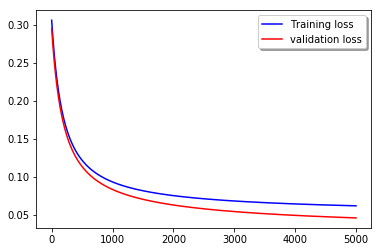

In [15]:
# epoch-loss curve
plt.figure(1)
fig, ax = plt.subplots(1,1)
ax.plot(history_loss, color='b', label="Training loss")
ax.plot(history_val_loss, color='r', label="validation loss",axes =ax)
legend = ax.legend(loc='best', shadow=True)

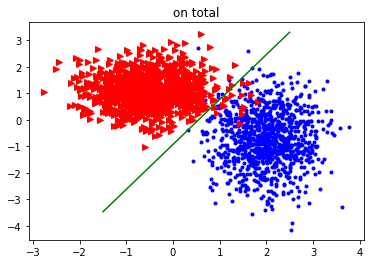

In [25]:
# use the result of w and b
weight = -(-2.880)/ 1.702
bias = -1.5767 / 1.702
x1 = -1.5
x2 = 2.5
y1 = weight*x1 + bias
y2 = weight*x2 + bias

plt.figure(2)
plt.title('on total')
plt.plot(data[0:1000, 0], data[0:1000, 1], '.b')
plt.plot(data[1000:, 0], data[1000:, 1], '>r')
plt.plot([x1, x2], [y1, y2], 'g')